<a href="https://colab.research.google.com/github/Swapnadeepgit/Timeseries-Forecating/blob/main/timeseriesforecatingFBPROPHET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

FBProphet is a powerful time series forecasting algorithm that can capture complex patterns in the data such as seasonality, trends, and the effect of holidays. It is based on a Bayesian approach that allows for uncertainty estimation in the predictions.

In [1]:
!pip install prophet

In [2]:
import pandas as pd
from prophet.plot import  plot_plotly, plot_components_plotly
from prophet import Prophet

In [4]:
df= pd.read_csv('/content/MaunaLoaDailyTemps (2).csv')
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1821 entries, 0 to 1820
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DATE     1821 non-null   object 
 1   MinTemp  1821 non-null   float64
 2   MaxTemp  1821 non-null   float64
 3   AvgTemp  1821 non-null   float64
 4   Sunrise  1821 non-null   int64  
 5   Sunset   1821 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 85.5+ KB


In [6]:
df.head()

,DATE,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
0,1/1/2014,33.0,46.0,40.0,657,1756
1,1/2/2014,35.0,50.0,43.0,657,1756
2,1/3/2014,36.0,45.0,41.0,657,1757
3,1/4/2014,32.0,41.0,37.0,658,1757
4,1/5/2014,24.0,38.0,31.0,658,1758


In [7]:
df=df[["DATE","AvgTemp"]]
df.head()

,DATE,AvgTemp
0,1/1/2014,40.0
1,1/2/2014,43.0
2,1/3/2014,41.0
3,1/4/2014,37.0
4,1/5/2014,31.0


Change the columns name for FB Prophet

In [8]:
df.columns=['ds','y']
df.head()

,ds,y
0,1/1/2014,40.0
1,1/2/2014,43.0
2,1/3/2014,41.0
3,1/4/2014,37.0
4,1/5/2014,31.0


In [9]:
df['ds'] =pd.to_datetime(df['ds'])
df.tail()

,ds,y
1816,2018-12-26,40.0
1817,2018-12-27,39.0
1818,2018-12-28,40.0
1819,2018-12-29,42.0
1820,2018-12-30,46.0


<Axes: xlabel='ds'>

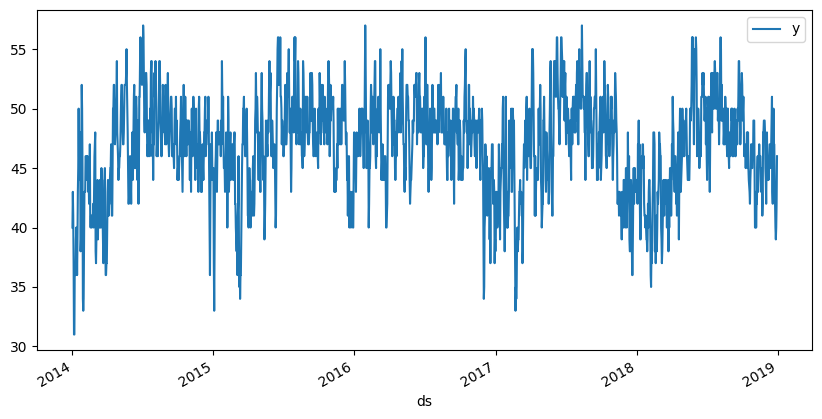

In [10]:
df.plot(x='ds',y='y',figsize=(10,5))

In [11]:
len(df)

1821

Train Test Split


In [12]:
trian = df.loc[:int(len(df)*0.365)]
test = df.loc[int(len(df)*0.365):]

In [13]:
m = Prophet()
m.fit(trian)
future = m.make_future_dataframe(periods=365)#MS for mothly and H for Hourly
forecast = m.predict(future)


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf4edege0/xzctmzyd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf4edege0/plfs026g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41121', 'data', 'file=/tmp/tmpf4edege0/xzctmzyd.json', 'init=/tmp/tmpf4edege0/plfs026g.json', 'output', 'file=/tmp/tmpf4edege0/prophet_modelx4184pyt/prophet_model-20250308065918.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:59:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:59:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [16]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1025,2016-10-23,58.531612,49.999397,66.265813,51.661221,65.050394,-0.236907,-0.236907,-0.236907,-0.236907,-0.236907,-0.236907,0.0,0.0,0.0,58.294705
1026,2016-10-24,58.553804,49.444845,66.762032,51.658608,65.072360,-0.136957,-0.136957,-0.136957,-0.136957,-0.136957,-0.136957,0.0,0.0,0.0,58.416846
1027,2016-10-25,58.575996,50.347391,66.754118,51.649764,65.087669,-0.279115,-0.279115,-0.279115,-0.279115,-0.279115,-0.279115,0.0,0.0,0.0,58.296881
1028,2016-10-26,58.598188,50.204194,66.073546,51.647181,65.103368,-0.008252,-0.008252,-0.008252,-0.008252,-0.008252,-0.008252,0.0,0.0,0.0,58.589936
1029,2016-10-27,58.620380,50.760015,66.777648,51.644865,65.142030,0.128005,0.128005,0.128005,0.128005,0.128005,0.128005,0.0,0.0,0.0,58.748385


In [15]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1025,2016-10-23,58.294705,49.999397,66.265813
1026,2016-10-24,58.416846,49.444845,66.762032
1027,2016-10-25,58.296881,50.347391,66.754118
1028,2016-10-26,58.589936,50.204194,66.073546
1029,2016-10-27,58.748385,50.760015,66.777648


In [17]:
test.tail()

,ds,y
1816,2018-12-26,40.0
1817,2018-12-27,39.0
1818,2018-12-28,40.0
1819,2018-12-29,42.0
1820,2018-12-30,46.0


In [20]:
plot_plotly(m, forecast)

In [21]:
plot_components_plotly(m, forecast)

In [35]:
#Model evaluation
from statsmodels.tools.eval_measures import rmse,meanabs


In [41]:
predictions = forecast.iloc[int(len(forecast) * 0.365):]['yhat']

In [45]:
TEST=test['y'].mean()

In [46]:
print("The mean value of the test set",TEST)

The mean value of the test set 46.87294727744166
